
## 特征工程

### 一、特征处理                                                      （sklearn.preprocessing/impute）
#### 1、标准化：
##### 噪音和异常值比较多适用，返回标准化后的值。
$$ x_i=\frac{x_i-平均值}{标准差} $$ 
sklearn.preprocessing.StandardScalaer().fit_transform(train_data)
#### 2、最大最小化：
##### 利用特征范围内的最大值和最小值进行缩放
$$ x_i= \frac{x_i-Min}{Max-Min} $$ 
sklearn.preprocessing.MinMaxScaler().fit_transform(train_data)
#### 3、归一化:
##### 没有极端值，需要控制结果值域范围适用，最大最小化的特例，将数据映射到[a,b]之间。
$$ x_i= \frac{x_i}{\sum _{i=0}^nx_i^2}$$ 
以上为规则为L2的归一化公式。    
sklearn.preprocessing.Normalizer().fit_transform(train_data)
#### 4、定量特征二值化：
##### 根据阈值把目标值划分为1,0两类
$$ x_i =1;  x_i>threshold $$ $$ x_i =0;  x_i≤threshold $$
sklearn.preprocessing.Binarizer().fit_transform(train_data)
#### 5、定性特征哑编码：
##### 将不能定量表达的变量表达为one—hot形式
sklearn.preprocessing.OneHotEncoder().fit_transform(test_data)
#### 6、缺失值处理:
##### 对给定格式的缺失值进行给定格式的填充，缺失值默认格式NaN，填充默认均值
sklearn.impute.SimpleImpute().fit_transform(train_data)
#### 7、数据转换:
##### 常见的包含多项式、指数、对数转换，即将值经过一个方程进行转换
##### 多项式转换：
sklearn.preprocessing.PolynomialFeatures().fit_transform(train_data)
##### 对数指数转换(第一个参数指定变化使用的函数)：
sklearn.preprocessing.FunctionTransformer(log1p).fit_transform(train_data)
### 二、特征降维（sklearn.feature_selection/decomposition/discrimnant_analysis）
#### 1、特征选择：
##### 去掉方差小接近0的特征，或选择与目标相关性高的特征，减少特征维度
##### 方差Filter：
通过设置方差的值，来筛选出大于方差的特征    
sklearn.feature_selection.VarianceThreshold(threshold=float or int).fit_transform(train_data)
##### 相关性Fliter：
选出前K个与目标相关性最高的特征，K值可以自己设定，第一个参数为计算相关性的函数，第二个为K值，当第一个参数为chi2时，为卡方检验。    
sklearn.feature_selection.SelectKBest(function=,k=).fit_transform(train_data)
##### 递归消除特征法RFE：
待研究    
sklearn.feature_selection.RFE().fit_transform()
##### 模型的特征选择法SelectFromModel：
待研究    
sklearn.feature_selection.SelectFromModel().fit_transform()
#### 2、线性转换：
##### 通过线性投影和向量转换的方式减少特征维度
##### 主成分降维PCA：
线性投影降维，n_components为目标特征的个数    
sklearn.decomposition.PCA(n_components=int).fit_transform(train_data)
##### 线性判别分析降维LDA：
向量转换降维。通过寻找向量A，让A·X的结果达到同类数据点靠近，不同类数据尽量分开的目的    
sklearn.discrimnant_analysis.LinearDiscriminantAnalysis(n_components=int).fit_transform(train_data)

###### 根据数据探索的情况形成基本思路：
###### 1、使用箱型图消除异常数据
###### 2、观察训练和测试集的特征分布重合度，将重合度较差的特征删除
###### 3、使用热力图观察特征与目标的相关性，将相关度绝对值小于0.1的特征剔除
###### 4、使用热力图观察特征和特征之间的相关性，特征之间具有高相关性会影响预测，先按保留90%信息的标准使用PCA降维，看最终保留多少数据，然后再根据结果生成数据。
###### 5、根据箱型图判断数据的值域范围是否接近，相差较大的情况下需要对数据进行归一化，这里使用最大最小归一化就行。

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from scipy import stats
from sklearn.decomposition import PCA  #导入PCA
from sklearn.preprocessing import MinMaxScaler  #导入最大最小归一化

In [2]:
train_data = pd.read_csv('zhengqi_train.txt',sep='\t')
test_data = pd.read_csv('zhengqi_test.txt',sep='\t')
train_data.info()
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2888 entries, 0 to 2887
Data columns (total 39 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V0      2888 non-null   float64
 1   V1      2888 non-null   float64
 2   V2      2888 non-null   float64
 3   V3      2888 non-null   float64
 4   V4      2888 non-null   float64
 5   V5      2888 non-null   float64
 6   V6      2888 non-null   float64
 7   V7      2888 non-null   float64
 8   V8      2888 non-null   float64
 9   V9      2888 non-null   float64
 10  V10     2888 non-null   float64
 11  V11     2888 non-null   float64
 12  V12     2888 non-null   float64
 13  V13     2888 non-null   float64
 14  V14     2888 non-null   float64
 15  V15     2888 non-null   float64
 16  V16     2888 non-null   float64
 17  V17     2888 non-null   float64
 18  V18     2888 non-null   float64
 19  V19     2888 non-null   float64
 20  V20     2888 non-null   float64
 21  V21     2888 non-null   float64
 22  

#### 1、使用箱型图消除异常数据

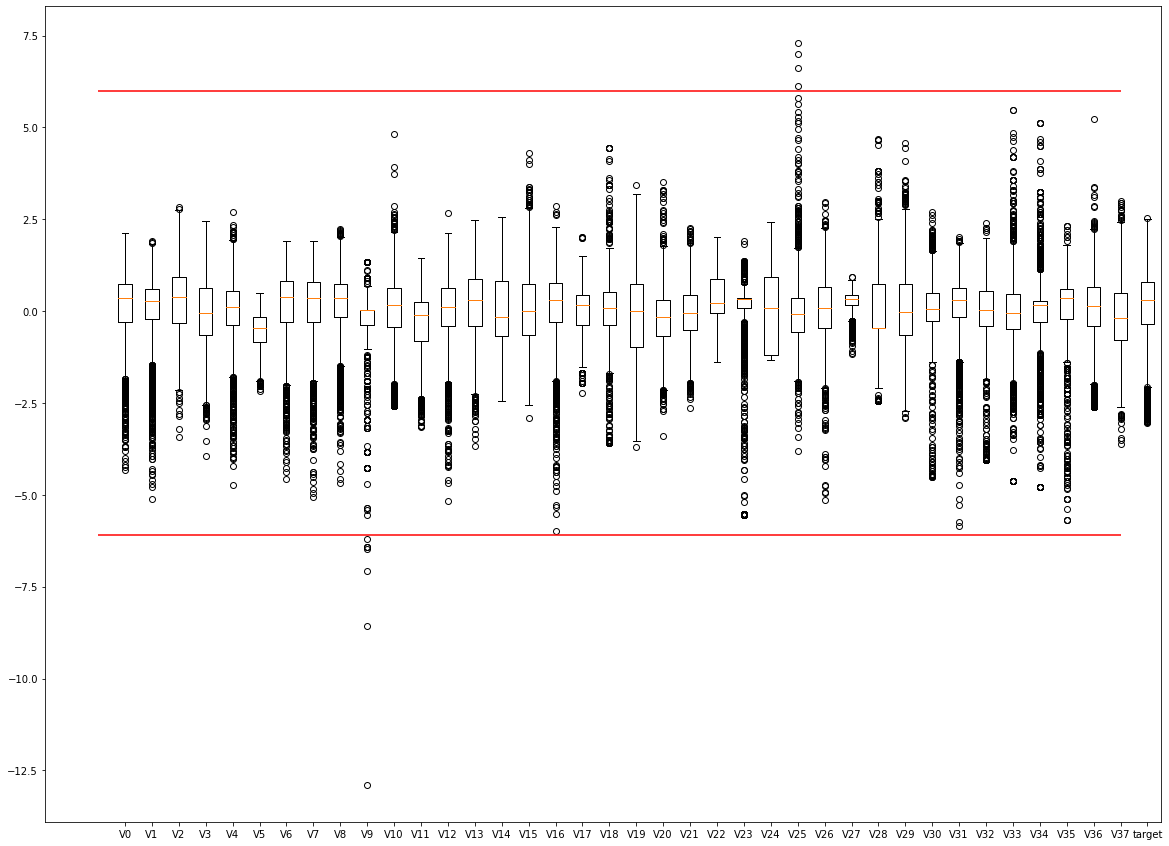

In [3]:
fig1= plt.figure(figsize=(20,15))
plt.boxplot(train_data,widths=0.5,labels=train_data.columns)
plt.hlines([6,-6.1],[0,0],[38,38],'r')

In [4]:
train_data_del_v9_lier = train_data[train_data['V9']>-6.1]
train_data_del_v9_v25_lier = train_data_del_v9_lier[train_data_del_v9_lier['V25']<6]
train_data_del_err_pt = train_data_del_v9_v25_lier
train_data_del_err_pt

,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V29,V30,V31,V32,V33,V34,V35,V36,V37,target
0,0.566,0.016,-0.143,0.407,0.452,-0.901,-1.812,-2.360,-0.436,-2.114,...,0.136,0.109,-0.615,0.327,-4.627,-4.789,-5.101,-2.608,-3.508,0.175
1,0.968,0.437,0.066,0.566,0.194,-0.893,-1.566,-2.360,0.332,-2.114,...,-0.128,0.124,0.032,0.600,-0.843,0.160,0.364,-0.335,-0.730,0.676
2,1.013,0.568,0.235,0.370,0.112,-0.797,-1.367,-2.360,0.396,-2.114,...,-0.009,0.361,0.277,-0.116,-0.843,0.160,0.364,0.765,-0.589,0.633
3,0.733,0.368,0.283,0.165,0.599,-0.679,-1.200,-2.086,0.403,-2.114,...,0.015,0.417,0.279,0.603,-0.843,-0.065,0.364,0.333,-0.112,0.206
4,0.684,0.638,0.260,0.209,0.337,-0.454,-1.073,-2.086,0.314,-2.114,...,0.183,1.078,0.328,0.418,-0.843,-0.215,0.364,-0.280,-0.028,0.384
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2883,0.190,-0.025,-0.138,0.161,0.600,-0.212,0.757,0.584,-0.026,0.904,...,0.128,-0.208,0.809,-0.173,0.247,-0.027,-0.349,0.576,0.686,0.235
2884,0.507,0.557,0.296,0.183,0.530,-0.237,0.749,0.584,0.537,0.904,...,0.291,-0.287,0.465,-0.310,0.763,0.498,-0.349,-0.615,-0.380,1.042
2885,-0.394,-0.721,-0.485,0.084,0.136,0.034,0.655,0.614,-0.818,0.904,...,0.291,-0.179,0.268,0.552,0.763,0.498,-0.349,0.951,0.748,0.005
2886,-0.219,-0.282,-0.344,-0.049,0.449,-0.140,0.560,0.583,-0.596,0.904,...,0.216,1.061,-0.051,1.023,0.878,0.610,-0.230,-0.301,0.555,0.350


In [5]:
#注意，去掉异常点之后的数据，存在索引和长度不完全匹配的情况
#索引是到了2887，但是实际长度只有2876行数据
#将其直接分为feature,target两个部分再组合的时候，如果只对feature或target中的一个做了某些会导致索引重组的处理
#之后再拼合feature、target的时候会导致合并后的数据存在null值，原因是两部分数据的索引对不上

#此时可以增加一个步骤，更新一下去掉异常点后的数据集的索引编号，让编号和长度保持一致即可
train_data_del_err_pt_reset_index = train_data_del_err_pt.reset_index(drop=True)
train_data_del_err_pt_reset_index

,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V29,V30,V31,V32,V33,V34,V35,V36,V37,target
0,0.566,0.016,-0.143,0.407,0.452,-0.901,-1.812,-2.360,-0.436,-2.114,...,0.136,0.109,-0.615,0.327,-4.627,-4.789,-5.101,-2.608,-3.508,0.175
1,0.968,0.437,0.066,0.566,0.194,-0.893,-1.566,-2.360,0.332,-2.114,...,-0.128,0.124,0.032,0.600,-0.843,0.160,0.364,-0.335,-0.730,0.676
2,1.013,0.568,0.235,0.370,0.112,-0.797,-1.367,-2.360,0.396,-2.114,...,-0.009,0.361,0.277,-0.116,-0.843,0.160,0.364,0.765,-0.589,0.633
3,0.733,0.368,0.283,0.165,0.599,-0.679,-1.200,-2.086,0.403,-2.114,...,0.015,0.417,0.279,0.603,-0.843,-0.065,0.364,0.333,-0.112,0.206
4,0.684,0.638,0.260,0.209,0.337,-0.454,-1.073,-2.086,0.314,-2.114,...,0.183,1.078,0.328,0.418,-0.843,-0.215,0.364,-0.280,-0.028,0.384
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2871,0.190,-0.025,-0.138,0.161,0.600,-0.212,0.757,0.584,-0.026,0.904,...,0.128,-0.208,0.809,-0.173,0.247,-0.027,-0.349,0.576,0.686,0.235
2872,0.507,0.557,0.296,0.183,0.530,-0.237,0.749,0.584,0.537,0.904,...,0.291,-0.287,0.465,-0.310,0.763,0.498,-0.349,-0.615,-0.380,1.042
2873,-0.394,-0.721,-0.485,0.084,0.136,0.034,0.655,0.614,-0.818,0.904,...,0.291,-0.179,0.268,0.552,0.763,0.498,-0.349,0.951,0.748,0.005
2874,-0.219,-0.282,-0.344,-0.049,0.449,-0.140,0.560,0.583,-0.596,0.904,...,0.216,1.061,-0.051,1.023,0.878,0.610,-0.230,-0.301,0.555,0.350


#### 2、对训练和测试数据进行归一化处理

In [6]:
#注意，要用训练数据fit之后的scaler来transform测试数据，不能用测试数据自身来fit然后transform
#如果不对训练和测试使用相同的归一化fit模型，则生成的训练测试数据会与原数据产生偏差，
#因为不用一个fit模型的话，train和test的转换方式不一样了，自然会导致转换后的数据关系和转换前的数据关系不一致

feature_colum = [col for col in train_data.columns if col not in ['target']]

min_max_scaler = MinMaxScaler()

train_data_scaler = min_max_scaler.fit_transform(train_data_del_err_pt_reset_index[feature_colum])
test_data_scaler = min_max_scaler.transform(test_data)

train_data_scaler = pd.DataFrame(train_data_scaler)
test_data_scaler = pd.DataFrame(test_data_scaler)

train_data_scaler.columns = feature_colum
test_data_scaler.columns = feature_colum

train_data_scaler['target'] = train_data_del_err_pt_reset_index['target']

train_data_scaler.info()
train_data_scaler.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2876 entries, 0 to 2875
Data columns (total 39 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V0      2876 non-null   float64
 1   V1      2876 non-null   float64
 2   V2      2876 non-null   float64
 3   V3      2876 non-null   float64
 4   V4      2876 non-null   float64
 5   V5      2876 non-null   float64
 6   V6      2876 non-null   float64
 7   V7      2876 non-null   float64
 8   V8      2876 non-null   float64
 9   V9      2876 non-null   float64
 10  V10     2876 non-null   float64
 11  V11     2876 non-null   float64
 12  V12     2876 non-null   float64
 13  V13     2876 non-null   float64
 14  V14     2876 non-null   float64
 15  V15     2876 non-null   float64
 16  V16     2876 non-null   float64
 17  V17     2876 non-null   float64
 18  V18     2876 non-null   float64
 19  V19     2876 non-null   float64
 20  V20     2876 non-null   float64
 21  V21     2876 non-null   float64
 22  

,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V29,V30,V31,V32,V33,V34,V35,V36,V37,target
count,2876.000000,2876.000000,2876.000000,2876.000000,2876.000000,2876.000000,2876.000000,2876.000000,2876.000000,2876.000000,...,2876.000000,2876.000000,2876.000000,2876.000000,2876.000000,2876.000000,2876.000000,2876.000000,2876.000000,2876.000000
mean,0.687196,0.723389,0.593583,0.606960,0.613416,0.606808,0.740994,0.741239,0.702547,0.784960,...,0.400379,0.635666,0.760634,0.633414,0.459572,0.484678,0.735105,0.336444,0.531963,0.135369
std,0.143485,0.138251,0.145470,0.150872,0.126546,0.193673,0.142697,0.136989,0.128560,0.124894,...,0.141419,0.121249,0.110769,0.136436,0.099363,0.101115,0.122169,0.123425,0.154064,0.974719
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3.044000
25%,0.621851,0.681516,0.497759,0.515827,0.555652,0.497098,0.664279,0.682314,0.653741,0.749891,...,0.298038,0.587375,0.722688,0.566000,0.409037,0.454490,0.684936,0.280238,0.430687,-0.337500
50%,0.723237,0.754518,0.609155,0.611024,0.626594,0.641333,0.772968,0.774045,0.728701,0.812527,...,0.384172,0.634102,0.782393,0.634869,0.454518,0.499949,0.755580,0.350178,0.524056,0.317500
75%,0.780384,0.803323,0.694302,0.714213,0.690145,0.757769,0.841833,0.836815,0.781065,0.812527,...,0.486610,0.694205,0.824949,0.714906,0.504979,0.511365,0.785260,0.414606,0.627017,0.796250
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.538000


In [7]:
test_data_scaler.info()
test_data_scaler.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1925 entries, 0 to 1924
Data columns (total 38 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V0      1925 non-null   float64
 1   V1      1925 non-null   float64
 2   V2      1925 non-null   float64
 3   V3      1925 non-null   float64
 4   V4      1925 non-null   float64
 5   V5      1925 non-null   float64
 6   V6      1925 non-null   float64
 7   V7      1925 non-null   float64
 8   V8      1925 non-null   float64
 9   V9      1925 non-null   float64
 10  V10     1925 non-null   float64
 11  V11     1925 non-null   float64
 12  V12     1925 non-null   float64
 13  V13     1925 non-null   float64
 14  V14     1925 non-null   float64
 15  V15     1925 non-null   float64
 16  V16     1925 non-null   float64
 17  V17     1925 non-null   float64
 18  V18     1925 non-null   float64
 19  V19     1925 non-null   float64
 20  V20     1925 non-null   float64
 21  V21     1925 non-null   float64
 22  

,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37
count,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,...,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000
mean,0.637059,0.700984,0.477791,0.632726,0.607511,1.130681,0.669870,0.699688,0.637926,0.843427,...,0.313556,0.367105,0.614756,0.719928,0.623735,0.457349,0.482778,0.673164,0.326501,0.582481
std,0.168976,0.160817,0.155176,0.161379,0.166273,0.360555,0.164142,0.149311,0.156540,0.147078,...,0.149752,0.117916,0.156533,0.144621,0.175311,0.098071,0.100537,0.118082,0.132661,0.143209
min,-0.091782,-0.106199,-0.138124,0.106035,-0.102899,0.379633,-0.167082,-0.082831,-0.197059,-0.177178,...,0.000000,0.063605,0.000000,-0.233613,-0.000776,0.000000,0.000000,-0.222222,0.000000,0.043240
25%,0.561555,0.646154,0.390845,0.516451,0.538261,0.862598,0.598567,0.651593,0.564653,0.749891,...,0.278919,0.277183,0.579211,0.683816,0.555297,0.412901,0.454490,0.666667,0.256819,0.486906
50%,0.676322,0.742644,0.504641,0.651177,0.627391,0.980532,0.699782,0.727247,0.675796,0.864579,...,0.280045,0.360070,0.627710,0.756987,0.652552,0.454518,0.499949,0.676518,0.342977,0.575822
75%,0.752519,0.801494,0.591869,0.740527,0.698696,1.538750,0.783712,0.798593,0.745856,0.937509,...,0.281593,0.449384,0.688438,0.804116,0.725764,0.500000,0.511365,0.755580,0.415371,0.674026
max,0.996694,1.030172,0.858835,1.022766,1.258841,2.005990,0.950483,0.924777,1.023497,1.062491,...,0.997889,0.791377,1.062535,0.925686,0.985109,1.000000,1.000000,0.918568,0.697043,1.012637


#### 3、删除训练和测试数据中分布吻合度低的特征

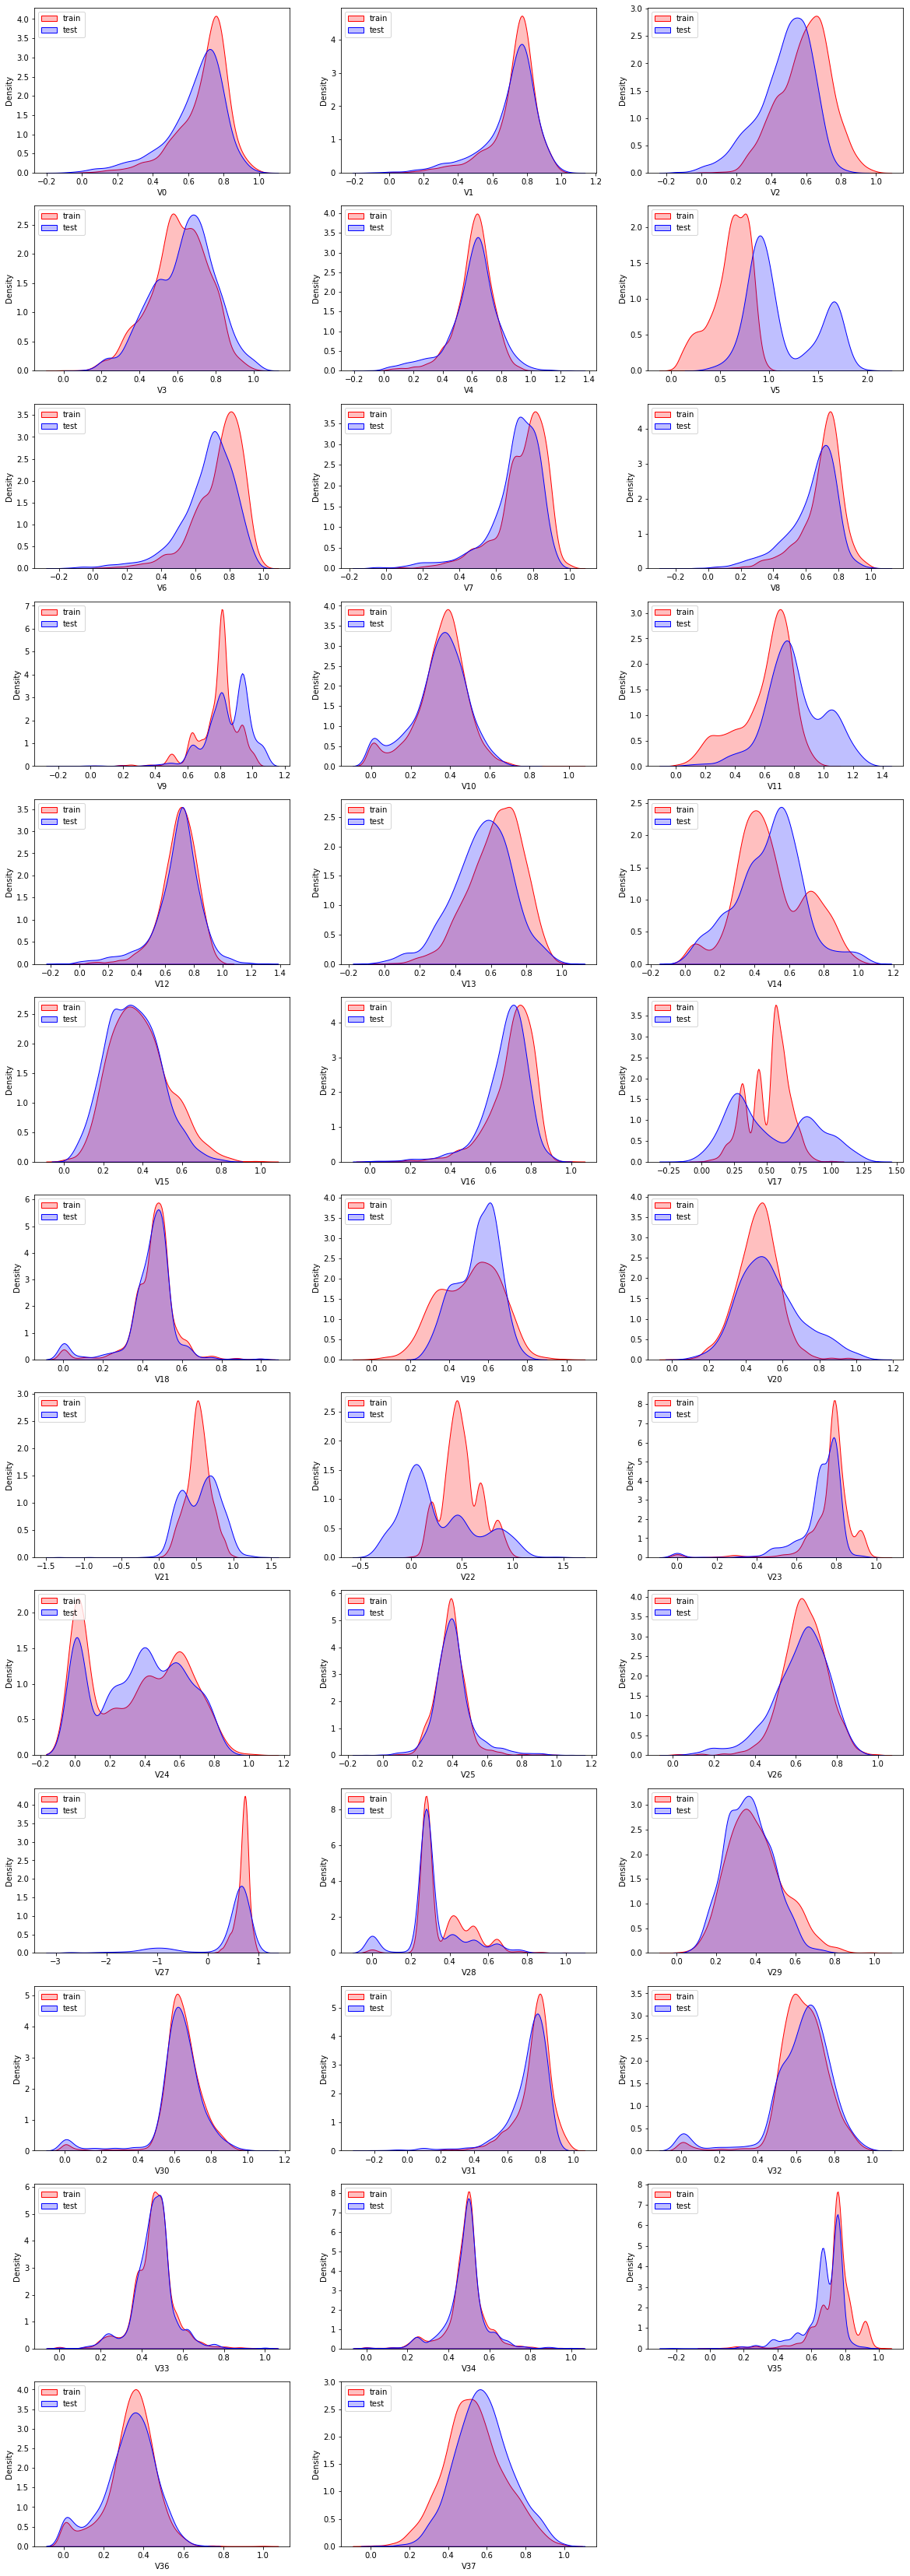

In [8]:
fig2= plt.figure(figsize=(20,60))
for i in range(38):
    plt.subplot(13,3,i+1)
    sn.kdeplot(train_data_scaler[f'V{i}'],color='Red',fill=True)
    sn.kdeplot(test_data_scaler[f'V{i}'],color='Blue',fill=True)
    plt.legend(['train','test'],loc='upper left')

In [9]:
low_kde_feat= ['V5','V9','V11','V17','V22','V28']
all_feat = train_data.columns.to_list()
high_kde_feat = [feat for feat in all_feat if feat not in low_kde_feat]
train_data_high_kde = train_data_scaler[high_kde_feat]

train_data_high_kde.info()
train_data_high_kde

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2876 entries, 0 to 2875
Data columns (total 33 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V0      2876 non-null   float64
 1   V1      2876 non-null   float64
 2   V2      2876 non-null   float64
 3   V3      2876 non-null   float64
 4   V4      2876 non-null   float64
 5   V6      2876 non-null   float64
 6   V7      2876 non-null   float64
 7   V8      2876 non-null   float64
 8   V10     2876 non-null   float64
 9   V12     2876 non-null   float64
 10  V13     2876 non-null   float64
 11  V14     2876 non-null   float64
 12  V15     2876 non-null   float64
 13  V16     2876 non-null   float64
 14  V18     2876 non-null   float64
 15  V19     2876 non-null   float64
 16  V20     2876 non-null   float64
 17  V21     2876 non-null   float64
 18  V23     2876 non-null   float64
 19  V24     2876 non-null   float64
 20  V25     2876 non-null   float64
 21  V26     2876 non-null   float64
 22  

,V0,V1,V2,V3,V4,V6,V7,V8,V10,V12,...,V29,V30,V31,V32,V33,V34,V35,V36,V37,target
0,0.755195,0.715907,0.524488,0.680337,0.675797,0.430396,0.385874,0.613522,0.221743,0.677353,...,0.404928,0.641467,0.666159,0.679231,0.000000,0.000000,0.074074,0.000000,0.018575,0.175
1,0.818482,0.778790,0.557939,0.705130,0.638406,0.468701,0.385874,0.724232,0.373887,0.668382,...,0.369577,0.643552,0.748349,0.721576,0.374950,0.499949,0.755580,0.289702,0.441535,0.676
2,0.825567,0.798357,0.584987,0.674567,0.626522,0.499689,0.385874,0.733458,0.466415,0.677500,...,0.385512,0.676487,0.779472,0.610517,0.374950,0.499949,0.755580,0.429901,0.463002,0.633
3,0.781486,0.768484,0.592670,0.642601,0.697101,0.525693,0.425208,0.734467,0.350013,0.686029,...,0.388725,0.684269,0.779726,0.722041,0.374950,0.477220,0.755580,0.374841,0.535627,0.206
4,0.773772,0.808813,0.588988,0.649462,0.659130,0.545469,0.425208,0.721638,0.314675,0.717353,...,0.411221,0.776126,0.785950,0.693346,0.374950,0.462067,0.755580,0.296712,0.548417,0.384
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2871,0.696001,0.709783,0.525288,0.641977,0.697246,0.830427,0.808498,0.672625,0.396412,0.752206,...,0.403856,0.597415,0.847053,0.601675,0.482957,0.481059,0.666667,0.405812,0.657125,0.235
2872,0.745907,0.796714,0.594750,0.645408,0.687101,0.829181,0.808498,0.753784,0.340302,0.748971,...,0.425683,0.586437,0.803354,0.580425,0.534086,0.534094,0.666667,0.254015,0.494823,1.042
2873,0.604062,0.605825,0.469750,0.629970,0.630000,0.814544,0.812805,0.558455,0.380901,0.660882,...,0.425683,0.601445,0.778328,0.714131,0.534086,0.534094,0.666667,0.453607,0.666565,0.005
2874,0.631612,0.671397,0.492318,0.609231,0.675362,0.799751,0.808355,0.590457,0.295252,0.680294,...,0.415640,0.773763,0.737805,0.787188,0.545482,0.545409,0.681506,0.294035,0.637180,0.350


#### 3、将与目标相关度小于0.1的特征剔除

<AxesSubplot:>

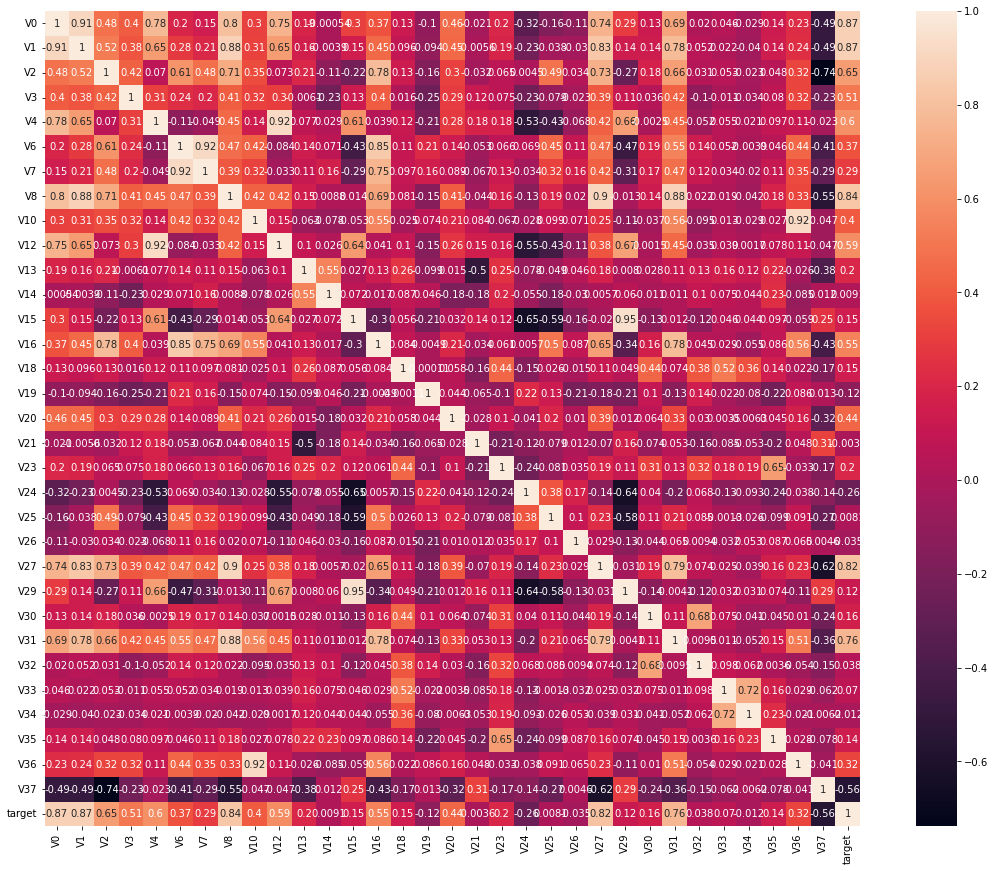

In [10]:
fig3 = plt.figure(figsize=(20,15))
train_data_high_kde_corr = train_data_high_kde.corr()
sn.heatmap(train_data_high_kde_corr,annot=True,square=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2876 entries, 0 to 2875
Data columns (total 26 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V0      2876 non-null   float64
 1   V1      2876 non-null   float64
 2   V2      2876 non-null   float64
 3   V3      2876 non-null   float64
 4   V4      2876 non-null   float64
 5   V6      2876 non-null   float64
 6   V7      2876 non-null   float64
 7   V8      2876 non-null   float64
 8   V10     2876 non-null   float64
 9   V12     2876 non-null   float64
 10  V13     2876 non-null   float64
 11  V15     2876 non-null   float64
 12  V16     2876 non-null   float64
 13  V18     2876 non-null   float64
 14  V19     2876 non-null   float64
 15  V20     2876 non-null   float64
 16  V23     2876 non-null   float64
 17  V24     2876 non-null   float64
 18  V27     2876 non-null   float64
 19  V29     2876 non-null   float64
 20  V30     2876 non-null   float64
 21  V31     2876 non-null   float64
 22  

,V0,V1,V2,V3,V4,V6,V7,V8,V10,V12,...,V23,V24,V27,V29,V30,V31,V35,V36,V37,target
count,2876.000000,2876.000000,2876.000000,2876.000000,2876.000000,2876.000000,2876.000000,2876.000000,2876.000000,2876.000000,...,2876.000000,2876.000000,2876.000000,2876.000000,2876.000000,2876.000000,2876.000000,2876.000000,2876.000000,2876.000000
mean,0.687196,0.723389,0.593583,0.606960,0.613416,0.740994,0.741239,0.702547,0.353312,0.692823,...,0.767053,0.350011,0.688200,0.400379,0.635666,0.760634,0.735105,0.336444,0.531963,0.135369
std,0.143485,0.138251,0.145470,0.150872,0.126546,0.142697,0.136989,0.128560,0.130178,0.128788,...,0.125461,0.273819,0.128512,0.141419,0.121249,0.110769,0.122169,0.123425,0.154064,0.974719
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3.044000
25%,0.621851,0.681516,0.497759,0.515827,0.555652,0.664279,0.682314,0.653741,0.291880,0.627463,...,0.761278,0.040616,0.633796,0.298038,0.587375,0.722688,0.684936,0.280238,0.430687,-0.337500
50%,0.723237,0.754518,0.609155,0.611024,0.626594,0.772968,0.774045,0.728701,0.369773,0.706324,...,0.789474,0.382002,0.712781,0.384172,0.634102,0.782393,0.755580,0.350178,0.524056,0.317500
75%,0.780384,0.803323,0.694302,0.714213,0.690145,0.841833,0.836815,0.781065,0.432189,0.778713,...,0.793535,0.594770,0.768789,0.486610,0.694205,0.824949,0.785260,0.414606,0.627017,0.796250
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.538000


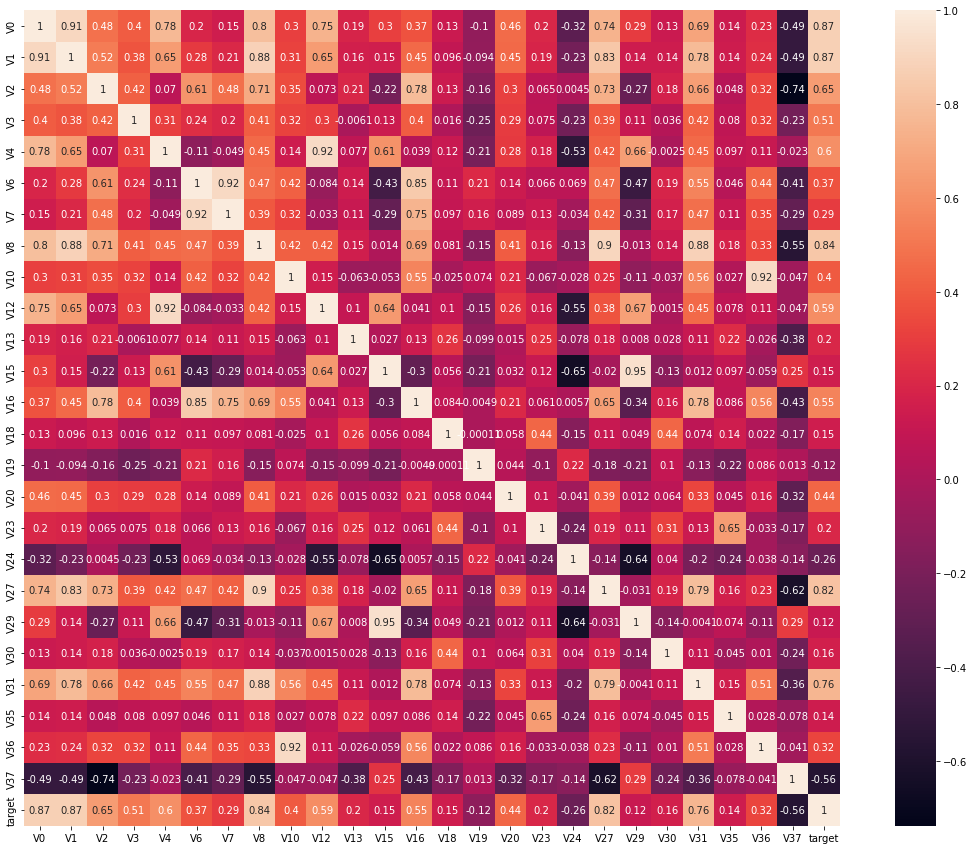

In [11]:
train_data_high_kde_corr_abs = train_data_high_kde_corr.abs()
high_corr_feat = [train_data_high_kde.columns.tolist()[k] for k,corr_value in enumerate(train_data_high_kde_corr_abs['target']) if corr_value>0.1 ]
train_data_high_corr = train_data_high_kde[high_corr_feat] 

fig4 = plt.figure(figsize=(20,15))
train_data_high_corr_corr = train_data_high_corr.corr()
sn.heatmap(train_data_high_corr_corr,annot=True,square=True)

test_data_high_corr = test_data_scaler[[feat for feat in high_corr_feat if feat not in ['target']]]

train_data_high_corr.info()
train_data_high_corr.describe()

In [12]:
test_data_high_corr.info()
test_data_high_corr.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1925 entries, 0 to 1924
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V0      1925 non-null   float64
 1   V1      1925 non-null   float64
 2   V2      1925 non-null   float64
 3   V3      1925 non-null   float64
 4   V4      1925 non-null   float64
 5   V6      1925 non-null   float64
 6   V7      1925 non-null   float64
 7   V8      1925 non-null   float64
 8   V10     1925 non-null   float64
 9   V12     1925 non-null   float64
 10  V13     1925 non-null   float64
 11  V15     1925 non-null   float64
 12  V16     1925 non-null   float64
 13  V18     1925 non-null   float64
 14  V19     1925 non-null   float64
 15  V20     1925 non-null   float64
 16  V23     1925 non-null   float64
 17  V24     1925 non-null   float64
 18  V27     1925 non-null   float64
 19  V29     1925 non-null   float64
 20  V30     1925 non-null   float64
 21  V31     1925 non-null   float64
 22  

,V0,V1,V2,V3,V4,V6,V7,V8,V10,V12,...,V20,V23,V24,V27,V29,V30,V31,V35,V36,V37
count,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,...,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000
mean,0.637059,0.700984,0.477791,0.632726,0.607511,0.669870,0.699688,0.637926,0.341555,0.683001,...,0.531435,0.712681,0.365295,0.361625,0.367105,0.614756,0.719928,0.673164,0.326501,0.582481
std,0.168976,0.160817,0.155176,0.161379,0.166273,0.164142,0.149311,0.156540,0.140810,0.167646,...,0.173113,0.132393,0.251530,0.695834,0.117916,0.156533,0.144621,0.118082,0.132661,0.143209
min,-0.091782,-0.106199,-0.138124,0.106035,-0.102899,-0.167082,-0.082831,-0.197059,0.000135,-0.121471,...,0.078100,-0.001343,0.001327,-2.733365,0.063605,0.000000,-0.233613,-0.222222,0.000000,0.043240
25%,0.561555,0.646154,0.390845,0.516451,0.538261,0.598567,0.651593,0.564653,0.271918,0.618529,...,0.408979,0.715091,0.189275,0.497846,0.277183,0.579211,0.683816,0.666667,0.256819,0.486906
50%,0.676322,0.742644,0.504641,0.651177,0.627391,0.699782,0.727247,0.675796,0.359185,0.707500,...,0.506569,0.722342,0.381471,0.642891,0.360070,0.627710,0.756987,0.676518,0.342977,0.575822
75%,0.752519,0.801494,0.591869,0.740527,0.698696,0.783712,0.798593,0.745856,0.434044,0.773824,...,0.630576,0.791890,0.569153,0.708952,0.449384,0.688438,0.804116,0.755580,0.415371,0.674026
max,0.996694,1.030172,0.858835,1.022766,1.258841,0.950483,0.924777,1.023497,0.769086,1.277941,...,1.076657,0.925886,0.833289,0.933461,0.791377,1.062535,0.925686,0.918568,0.697043,1.012637


#### 4、从上图可以看见特征与特征之间存在较高相关性的情况较多，下面使用PCA降维，减少特征与特征之间的相关性


In [13]:
#按照保留95%的信息，先用train_data测算一下能保留下来多少个特征
pca_test = PCA(n_components=0.95)

train_data_pca_test = pca_test.fit_transform(train_data_high_corr.drop(['target'],axis=1))
train_data_pca_test = pd.DataFrame(train_data_pca_test)

train_data_pca_test.info()
train_data_pca_test.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2876 entries, 0 to 2875
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       2876 non-null   float64
 1   1       2876 non-null   float64
 2   2       2876 non-null   float64
 3   3       2876 non-null   float64
 4   4       2876 non-null   float64
 5   5       2876 non-null   float64
 6   6       2876 non-null   float64
 7   7       2876 non-null   float64
 8   8       2876 non-null   float64
 9   9       2876 non-null   float64
 10  10      2876 non-null   float64
 11  11      2876 non-null   float64
 12  12      2876 non-null   float64
dtypes: float64(13)
memory usage: 292.2 KB


,0,1,2,3,4,5,6,7,8,9,10,11,12
count,2.876000e+03,2.876000e+03,2.876000e+03,2.876000e+03,2.876000e+03,2.876000e+03,2.876000e+03,2.876000e+03,2.876000e+03,2.876000e+03,2.876000e+03,2.876000e+03,2.876000e+03
mean,1.976475e-17,-3.952950e-17,1.161179e-16,7.411781e-18,-5.929425e-17,3.952950e-17,5.867660e-17,8.647078e-17,-1.111767e-17,4.879422e-17,5.620601e-17,9.017667e-17,-6.238249e-17
std,3.840477e-01,3.423395e-01,2.045193e-01,1.977184e-01,1.658767e-01,1.470211e-01,1.395414e-01,1.296748e-01,1.199321e-01,1.124867e-01,9.798109e-02,9.185801e-02,8.159365e-02
min,-9.320095e-01,-8.379270e-01,-7.916021e-01,-7.065682e-01,-4.452660e-01,-5.941737e-01,-5.294757e-01,-4.674042e-01,-5.319105e-01,-4.753776e-01,-3.790985e-01,-3.239939e-01,-3.323416e-01
25%,-2.537384e-01,-2.545326e-01,-1.279173e-01,-1.278624e-01,-1.212082e-01,-8.601165e-02,-8.800741e-02,-7.751558e-02,-6.920188e-02,-7.002876e-02,-6.463497e-02,-6.013788e-02,-4.610842e-02
50%,-2.886601e-02,-1.893454e-02,-3.005209e-03,-1.292484e-02,-2.360625e-03,-1.006844e-03,3.503219e-03,4.656416e-03,-3.556667e-03,2.270063e-03,-4.420087e-03,-5.581744e-03,-1.066518e-03
75%,1.947556e-01,2.311176e-01,1.233665e-01,1.057083e-01,1.111454e-01,8.561014e-02,8.394014e-02,7.817342e-02,6.719797e-02,7.208347e-02,5.881814e-02,5.394869e-02,4.550588e-02
max,1.701455e+00,1.344978e+00,9.169933e-01,9.554204e-01,8.762068e-01,8.601535e-01,7.014691e-01,5.801701e-01,6.022486e-01,4.825052e-01,4.363521e-01,4.172203e-01,4.653405e-01


In [14]:
#按保留95%的信息进行线性转换，生成了13个新的特征，下面以13为新特征值，将训练数据和测试数据进行PCA转换
pca = PCA(n_components=13)

train_data_pca = pca.fit_transform(train_data_high_corr.drop(['target'],axis=1))
train_data_pca = pd.DataFrame(train_data_pca)

train_data_pca['target'] = train_data_high_corr['target']

train_data_pca.info()
train_data_pca.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2876 entries, 0 to 2875
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       2876 non-null   float64
 1   1       2876 non-null   float64
 2   2       2876 non-null   float64
 3   3       2876 non-null   float64
 4   4       2876 non-null   float64
 5   5       2876 non-null   float64
 6   6       2876 non-null   float64
 7   7       2876 non-null   float64
 8   8       2876 non-null   float64
 9   9       2876 non-null   float64
 10  10      2876 non-null   float64
 11  11      2876 non-null   float64
 12  12      2876 non-null   float64
 13  target  2876 non-null   float64
dtypes: float64(14)
memory usage: 314.7 KB


,0,1,2,3,4,5,6,7,8,9,10,11,12,target
count,2.876000e+03,2.876000e+03,2.876000e+03,2.876000e+03,2.876000e+03,2.876000e+03,2.876000e+03,2.876000e+03,2.876000e+03,2.876000e+03,2.876000e+03,2.876000e+03,2.876000e+03,2876.000000
mean,3.952950e-17,-3.952950e-17,1.161179e-16,1.235297e-17,-5.929425e-17,3.705890e-17,5.991190e-17,9.511786e-17,-1.235297e-17,4.447069e-17,5.805895e-17,9.017667e-17,-5.929425e-17,0.135369
std,3.840477e-01,3.423395e-01,2.045193e-01,1.977184e-01,1.658767e-01,1.470211e-01,1.395414e-01,1.296748e-01,1.199321e-01,1.124867e-01,9.798109e-02,9.185801e-02,8.159365e-02,0.974719
min,-9.320095e-01,-8.379270e-01,-7.916021e-01,-7.065682e-01,-4.452660e-01,-5.941737e-01,-5.294757e-01,-4.674043e-01,-5.319106e-01,-4.753778e-01,-3.790984e-01,-3.239929e-01,-3.323403e-01,-3.044000
25%,-2.537384e-01,-2.545326e-01,-1.279173e-01,-1.278624e-01,-1.212082e-01,-8.601164e-02,-8.800741e-02,-7.751555e-02,-6.920176e-02,-7.002890e-02,-6.463466e-02,-6.013841e-02,-4.610755e-02,-0.337500
50%,-2.886601e-02,-1.893454e-02,-3.005211e-03,-1.292484e-02,-2.360626e-03,-1.006842e-03,3.503217e-03,4.656405e-03,-3.556689e-03,2.269871e-03,-4.420134e-03,-5.581793e-03,-1.066703e-03,0.317500
75%,1.947556e-01,2.311176e-01,1.233665e-01,1.057083e-01,1.111454e-01,8.561013e-02,8.394014e-02,7.817342e-02,6.719792e-02,7.208353e-02,5.881801e-02,5.394899e-02,4.550663e-02,0.796250
max,1.701455e+00,1.344978e+00,9.169933e-01,9.554204e-01,8.762068e-01,8.601535e-01,7.014691e-01,5.801701e-01,6.022486e-01,4.825051e-01,4.363522e-01,4.172200e-01,4.653403e-01,2.538000


In [15]:
test_data_pca = pca.transform(test_data_high_corr)
test_data_pca = pd.DataFrame(test_data_pca)

test_data_pca.info()
test_data_pca.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1925 entries, 0 to 1924
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1925 non-null   float64
 1   1       1925 non-null   float64
 2   2       1925 non-null   float64
 3   3       1925 non-null   float64
 4   4       1925 non-null   float64
 5   5       1925 non-null   float64
 6   6       1925 non-null   float64
 7   7       1925 non-null   float64
 8   8       1925 non-null   float64
 9   9       1925 non-null   float64
 10  10      1925 non-null   float64
 11  11      1925 non-null   float64
 12  12      1925 non-null   float64
dtypes: float64(13)
memory usage: 195.6 KB


,0,1,2,3,4,5,6,7,8,9,10,11,12
count,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000
mean,0.222079,0.113842,0.053091,0.100529,-0.029422,-0.009831,-0.033908,-0.067553,0.090161,-0.002329,-0.097080,0.050927,-0.011320
std,0.440435,0.394326,0.226035,0.201455,0.136767,0.174084,0.187338,0.183249,0.140758,0.108559,0.132473,0.119844,0.093207
min,-0.817579,-0.698686,-0.899932,-0.538406,-0.376166,-0.750652,-0.523293,-0.735503,-0.333599,-0.403685,-0.485764,-0.275542,-0.419198
25%,-0.080192,-0.180944,-0.079988,-0.023985,-0.122929,-0.116350,-0.160761,-0.159905,-0.000708,-0.074028,-0.186577,-0.035681,-0.065495
50%,0.155154,0.048990,0.056380,0.080293,-0.045241,-0.012834,-0.048607,-0.046694,0.078649,-0.011714,-0.093929,0.039703,-0.007592
75%,0.442406,0.366894,0.186943,0.205966,0.040287,0.090207,0.072055,0.040712,0.178162,0.066801,-0.005935,0.128929,0.042041
max,2.149280,1.774280,0.915223,0.960794,0.695334,0.773066,1.029240,0.597300,0.662915,0.381681,0.340326,0.427325,0.399589


In [16]:
#使用PCA降维之后，新生成的特征标签是数值，不是字符串，这会在绘制特征目标回归分布图时遇到问题，所以这里需要将生成的标签重新命名一下
new_feat_name = [f'NEW_V{i}' for i,feat in enumerate(train_data_pca.columns) if feat not in ['target']]
test_data_pca.columns = new_feat_name

new_feat_name.append('target')
train_data_pca.columns = new_feat_name

print(test_data_pca.columns)
print(train_data_pca.columns)

Index(['NEW_V0', 'NEW_V1', 'NEW_V2', 'NEW_V3', 'NEW_V4', 'NEW_V5', 'NEW_V6',
       'NEW_V7', 'NEW_V8', 'NEW_V9', 'NEW_V10', 'NEW_V11', 'NEW_V12'],
      dtype='object')
Index(['NEW_V0', 'NEW_V1', 'NEW_V2', 'NEW_V3', 'NEW_V4', 'NEW_V5', 'NEW_V6',
       'NEW_V7', 'NEW_V8', 'NEW_V9', 'NEW_V10', 'NEW_V11', 'NEW_V12',
       'target'],
      dtype='object')


#### 至此，特征工程处理完毕，处理完成后的训练数据和测试数据，都有13个新的特征，其中，训练数据共有2876条，测试数据有1925条。下面将做完特征工程的数据展示一下，观察其各方面的表现是否比之前更好

箱型图：


C:\Users\Administrator\AppData\Local\Temp/ipykernel_11964/1618793857.py:4: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  new_fig1.show()


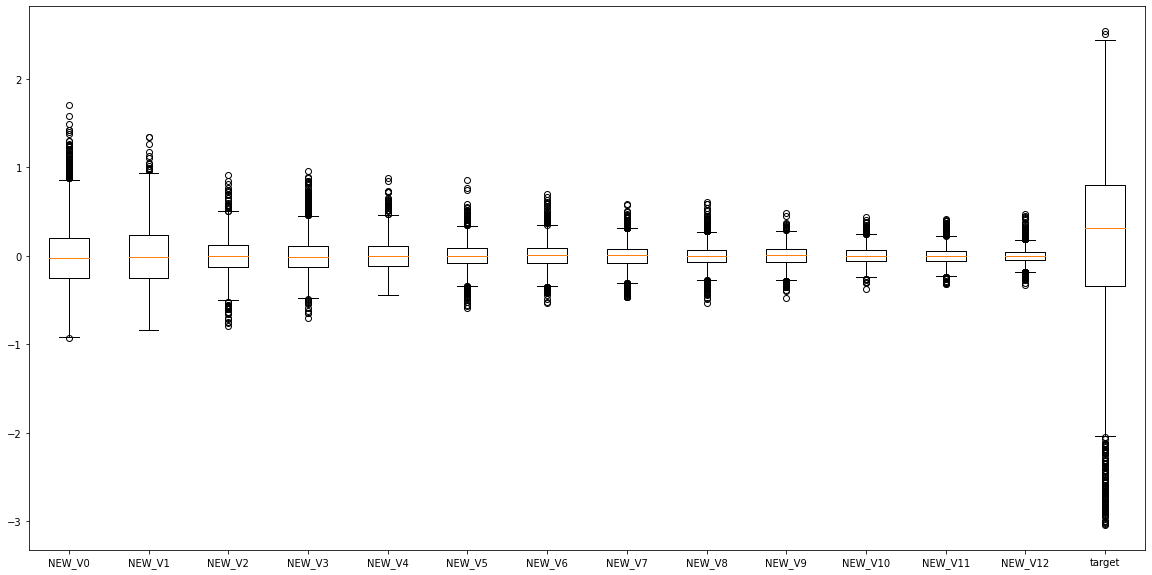

In [17]:
print('箱型图：')
new_fig1 = plt.figure(figsize=(20,10))
plt.boxplot(train_data_pca,labels=train_data_pca.columns)
new_fig1.show()

C:\Users\Administrator\AppData\Local\Temp/ipykernel_11964/4207134269.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(train_data_pca[f'NEW_V{i}'],fit= stats.norm)



直方图：


C:\Users\Administrator\AppData\Local\Temp/ipykernel_11964/4207134269.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(train_data_pca[f'NEW_V{i}'],fit= stats.norm)
C:\Users\Administrator\AppData\Local\Temp/ipykernel_11964/4207134269.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(train_data_

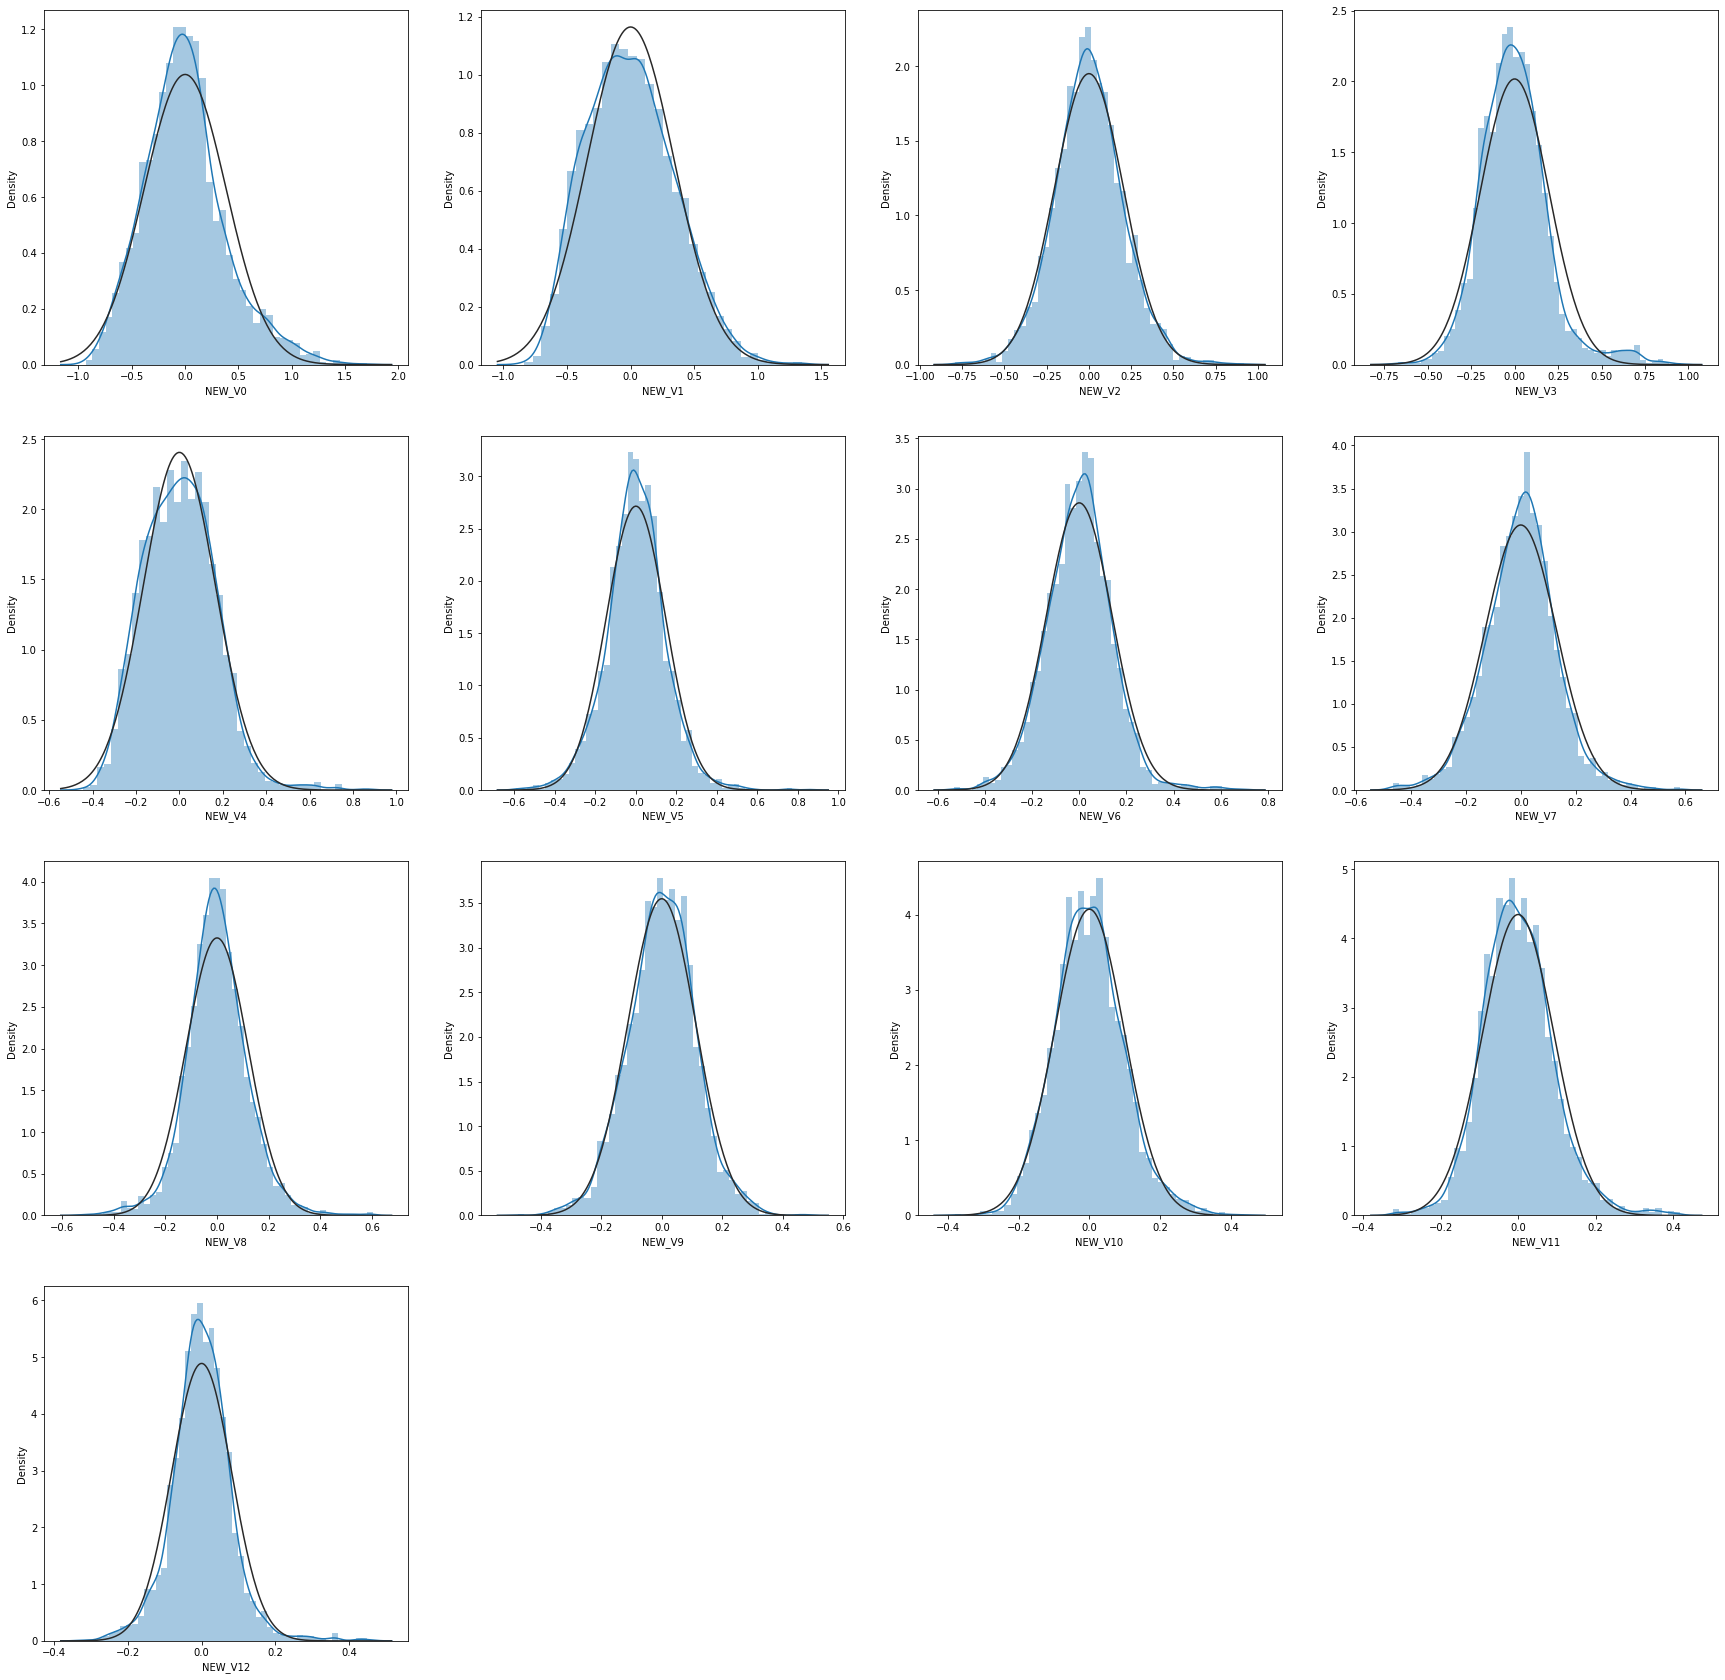

In [18]:
print('\n直方图：')
new_fig2 = plt.figure(figsize=(30,30))
for i in range(13):
    plt.subplot(4,4,i+1)
    sn.distplot(train_data_pca[f'NEW_V{i}'],fit= stats.norm)

\Q-Q图：


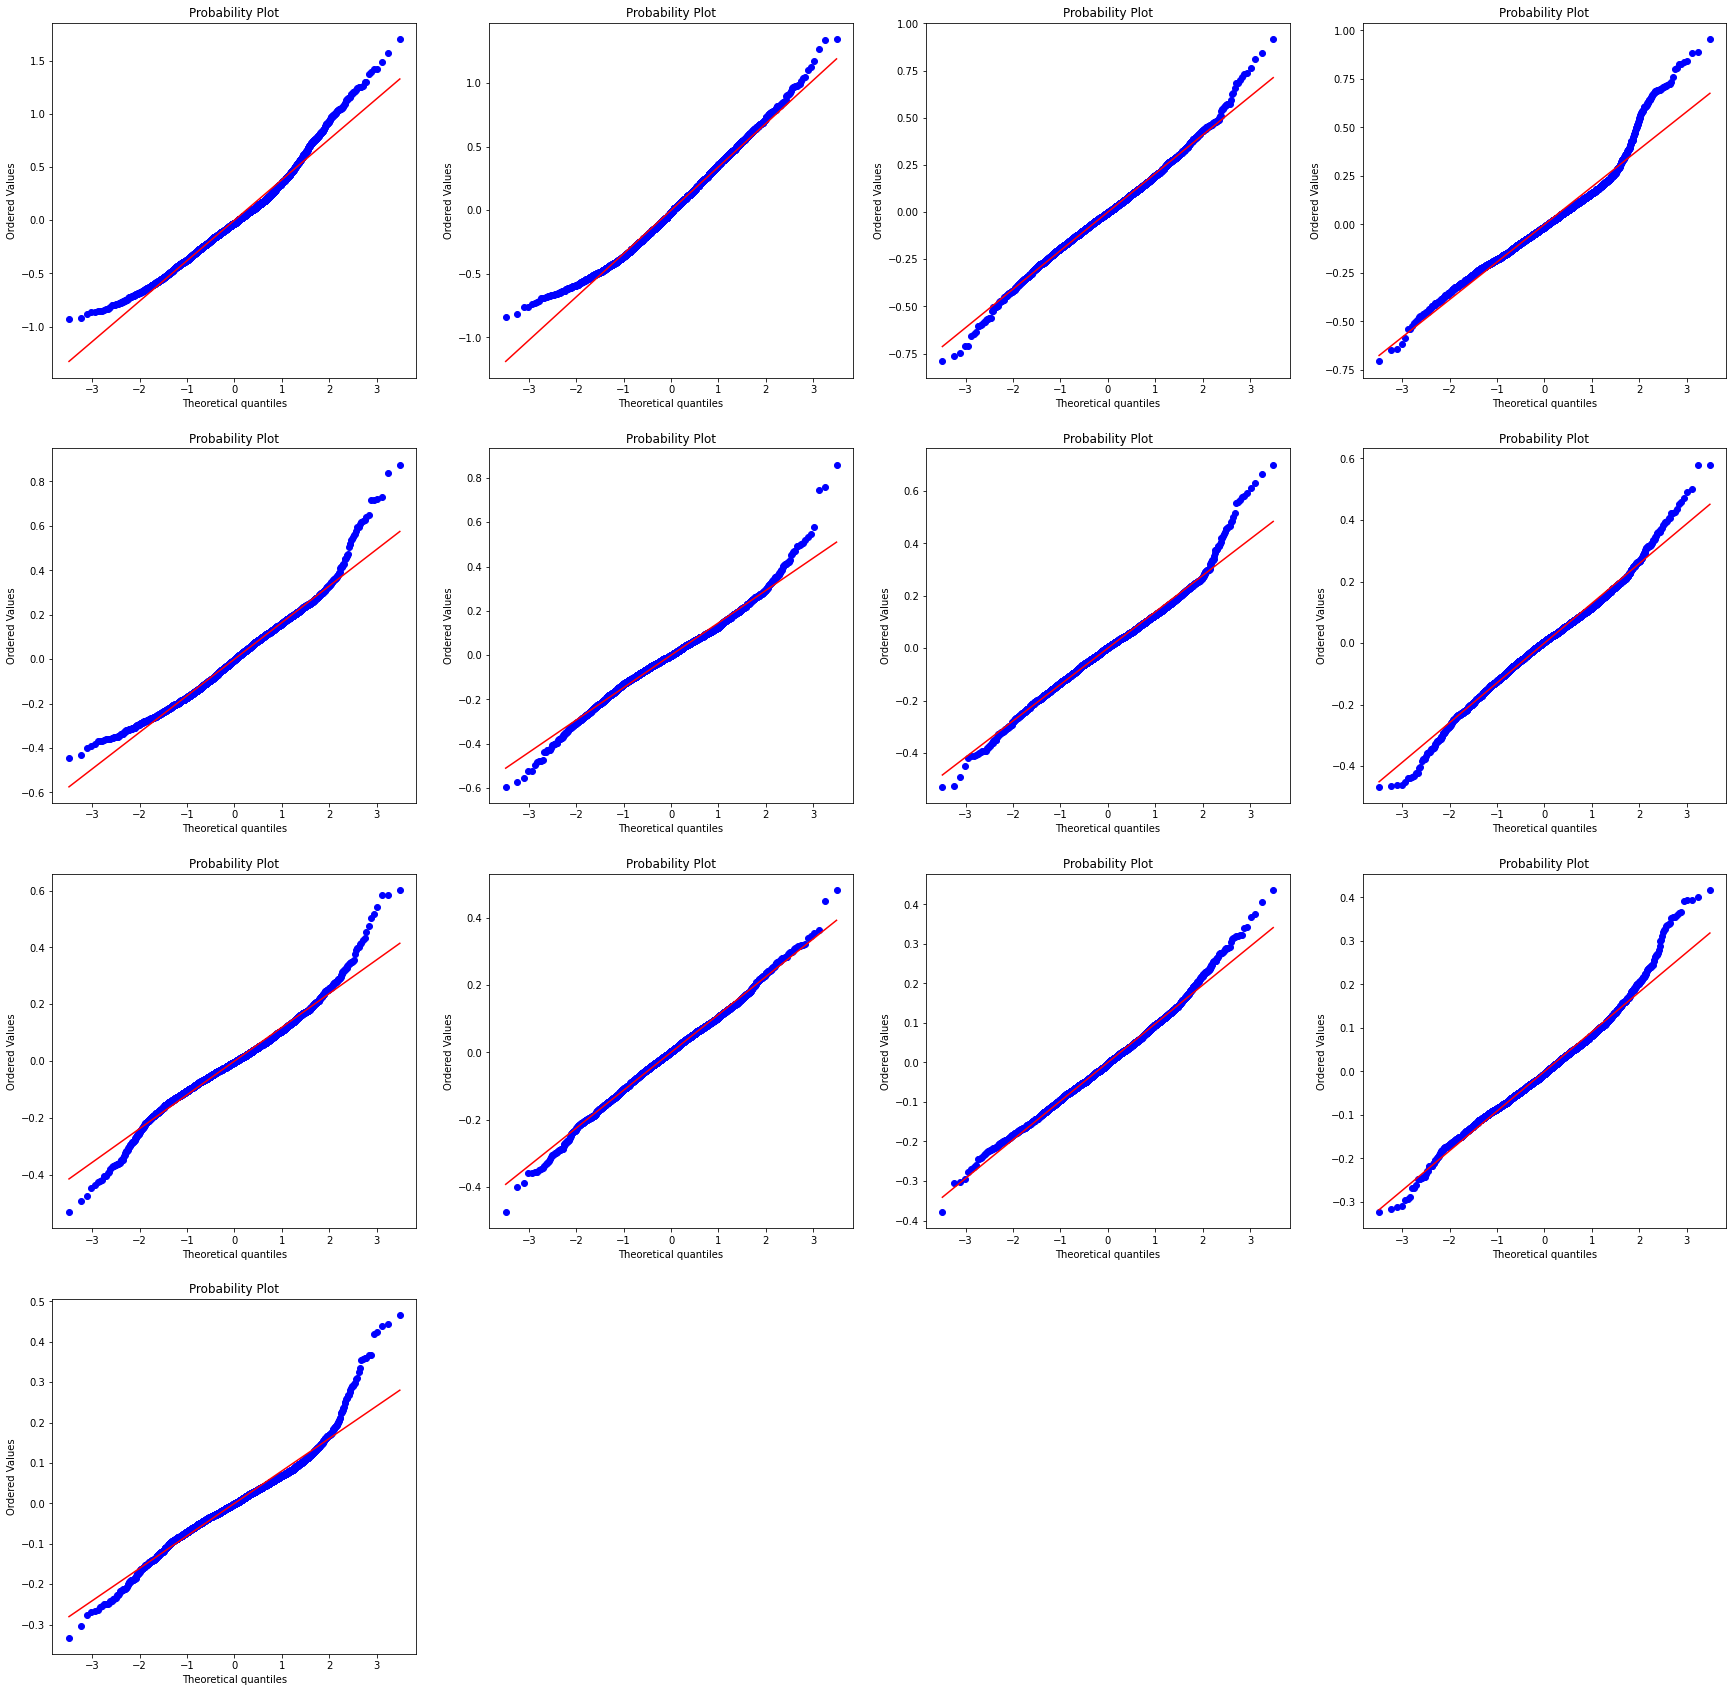

In [19]:
print('\Q-Q图：')
new_fig3 = plt.figure(figsize=(30,30))
for i in range(13):
    plt.subplot(4,4,i+1)
    stats.probplot(train_data_pca[f'NEW_V{i}'],plot=plt)



KDE图


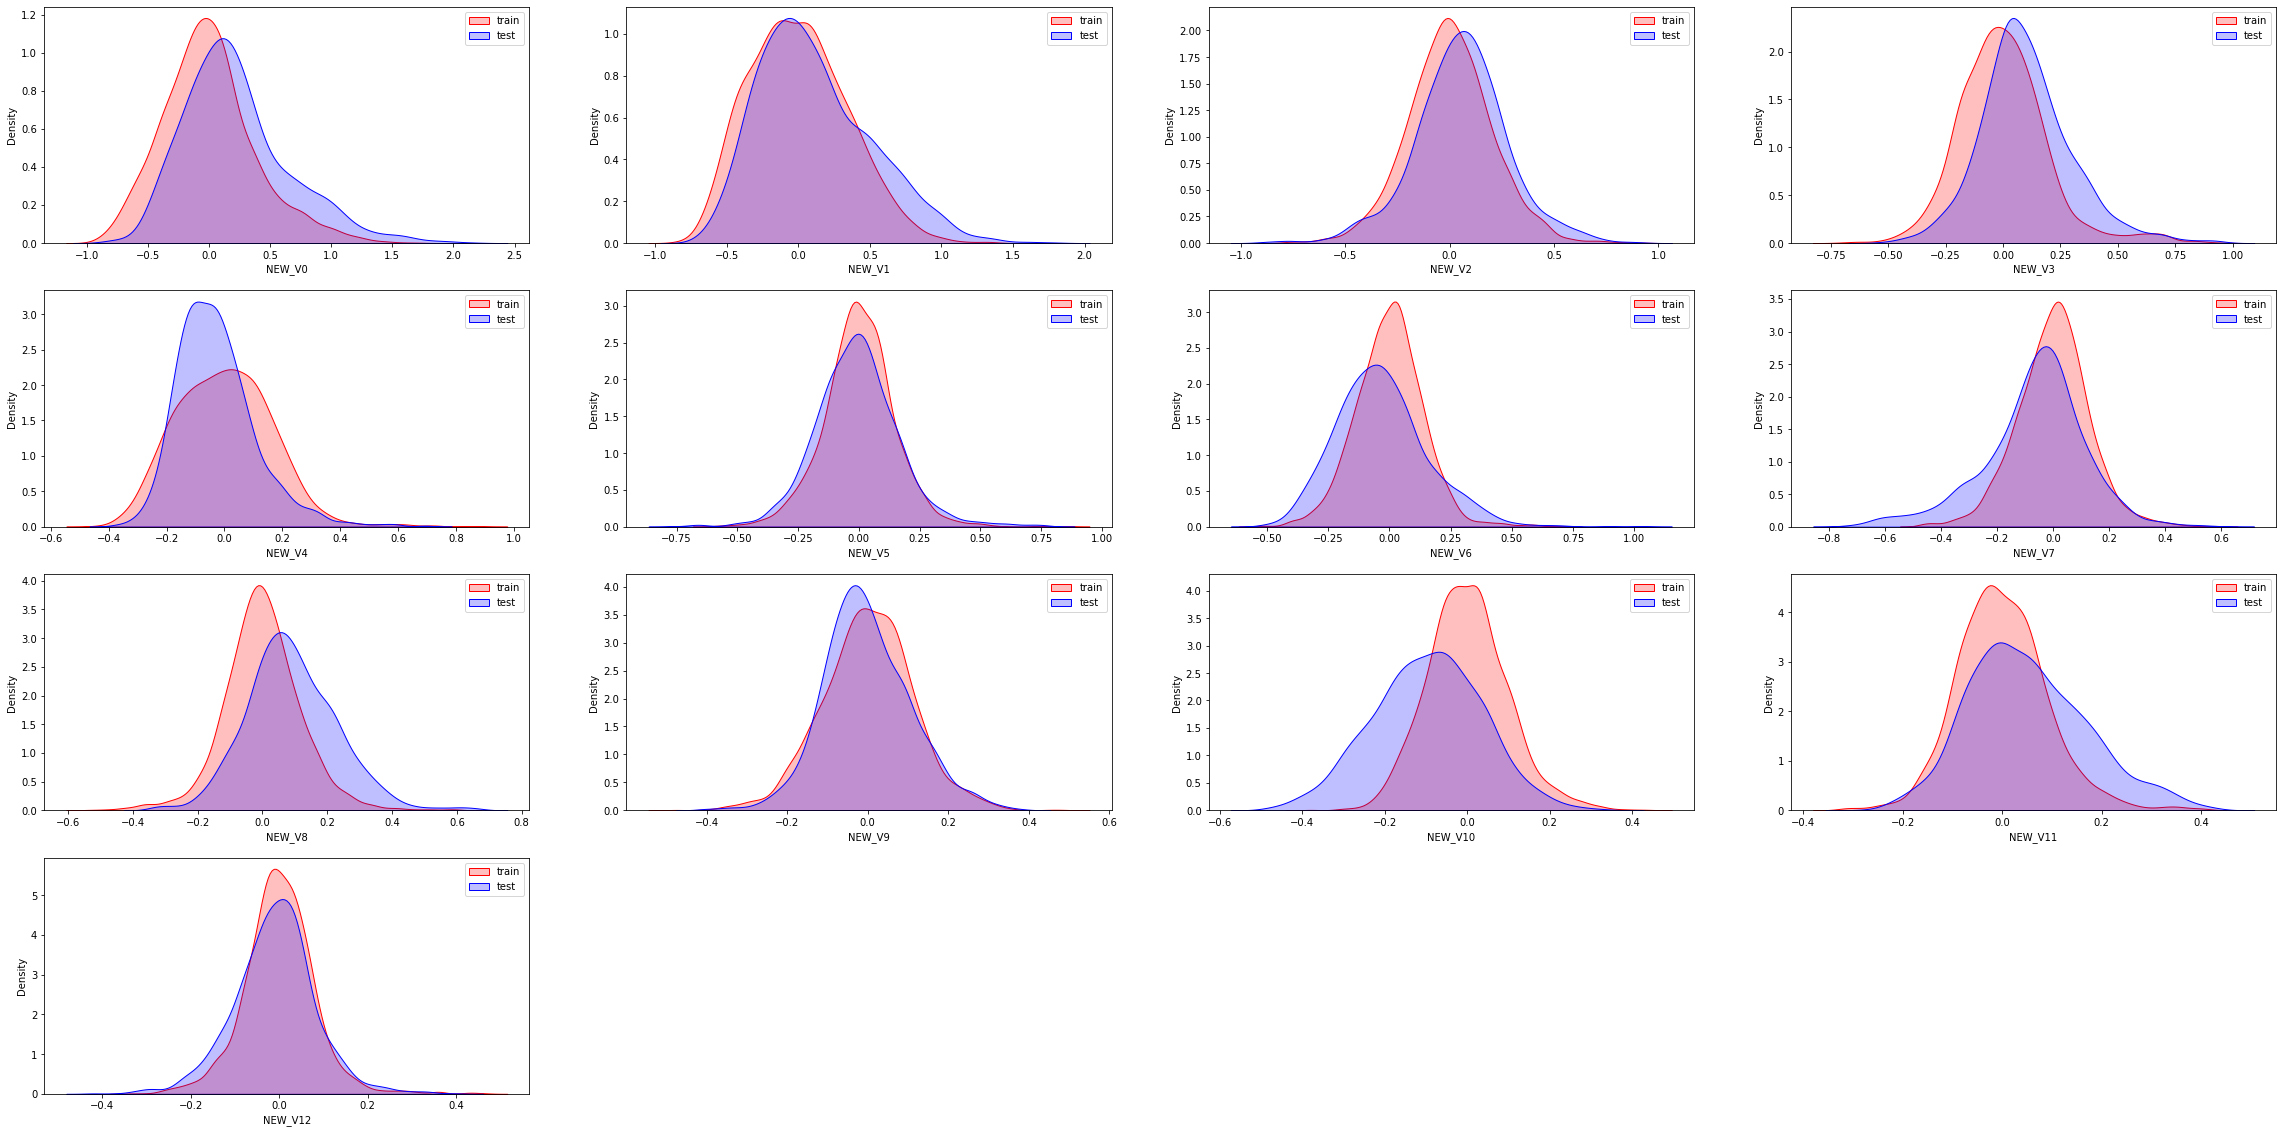

In [20]:
print('\nKDE图')
new_fig5 = plt.figure(figsize=(40,20))
for i in range(13):
    plt.subplot(4,4,i+1)
    sn.kdeplot(train_data_pca[f'NEW_V{i}'],fill=True,color='Red')
    sn.kdeplot(test_data_pca[f'NEW_V{i}'],fill=True,color='Blue')
    plt.legend(['train','test'])


特征目标回归图：


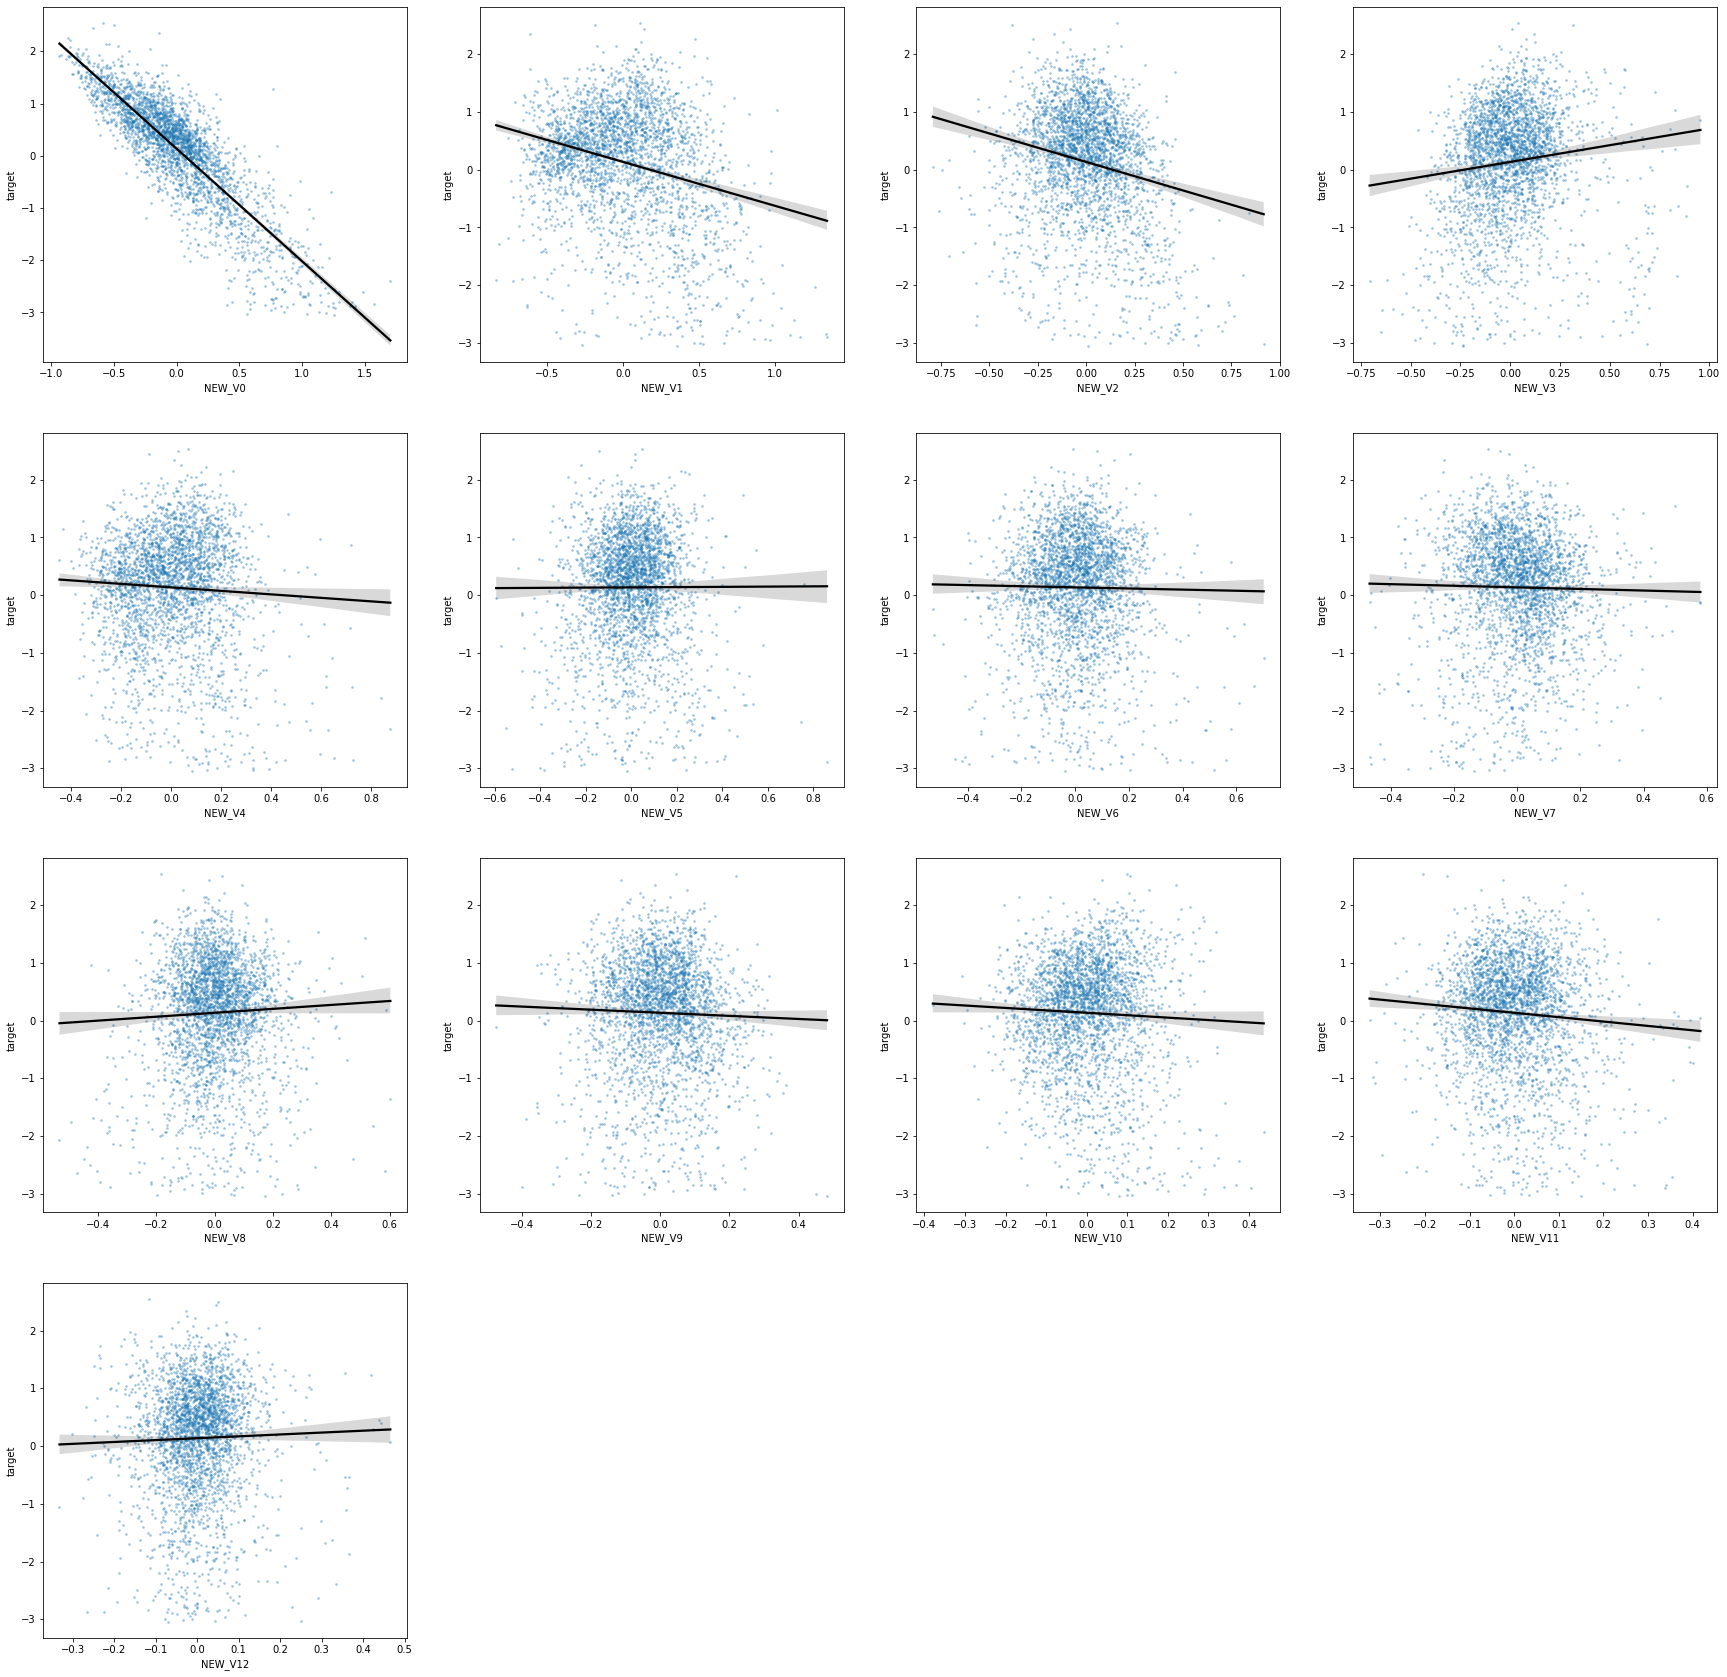

In [21]:
print('\n特征目标回归图：')
new_fig4 = plt.figure(figsize=(30,30))
for i in range(13):
    plt.subplot(4,4,i+1)
    sn.regplot(data=train_data_pca,x=f'NEW_V{i}',y='target',line_kws={'color':'k'},scatter_kws={'s':3,'alpha':0.3})
    


热力图：


<AxesSubplot:>

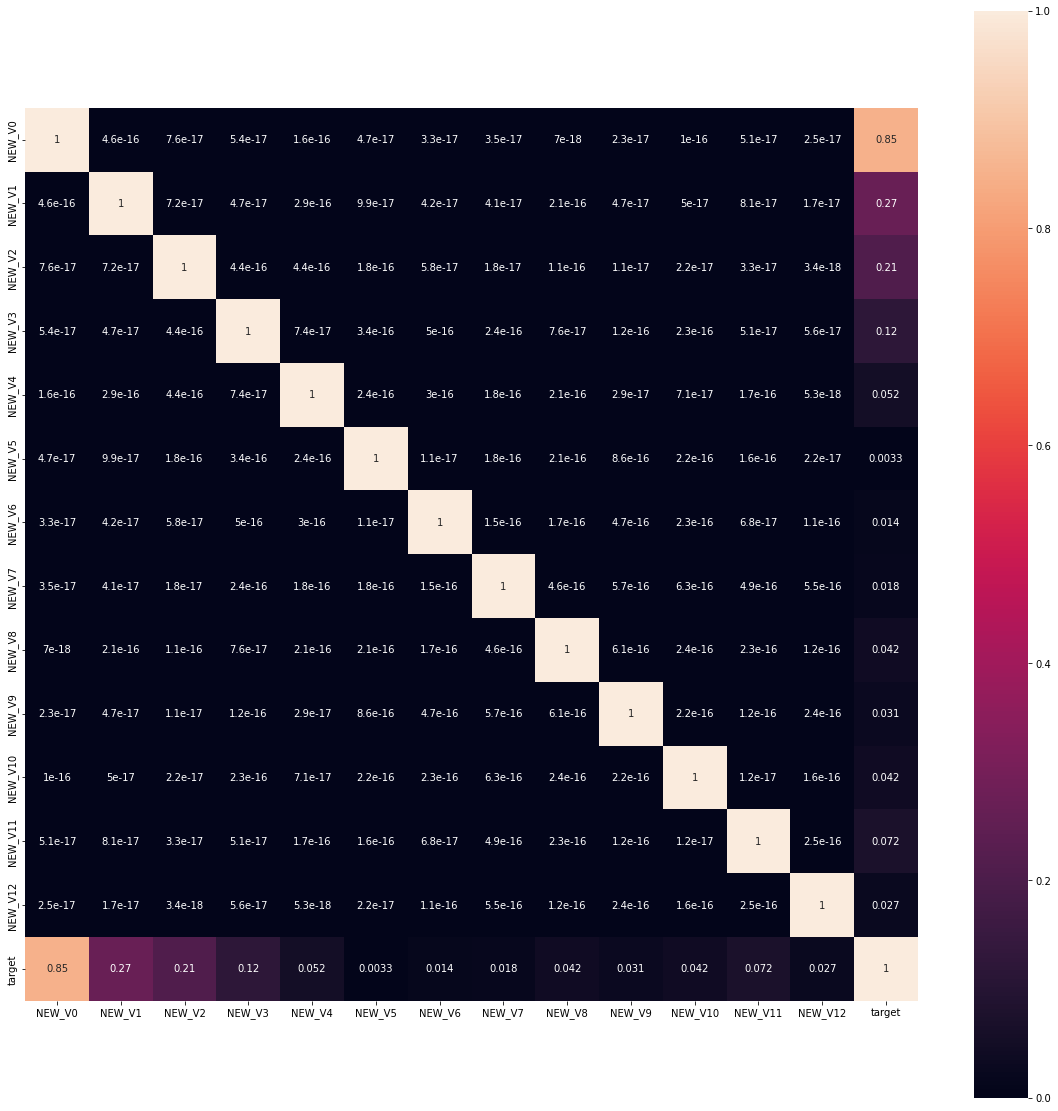

In [22]:
print('\n热力图：')
corr_tmp = train_data_pca.corr()
corr_tmp = corr_tmp.abs()
new_fig6 = plt.figure(figsize=(20,20))
sn.heatmap(corr_tmp,annot=True,square=True)

#### 结论：处理过后的数据，表现比之前好了不少。
#### 主要体现在：1、从箱型图中可以看到，训练数据中没有异常值了，2、训练数据的特征分布情况有提示，和正态分布曲线基本贴合，3、训练数据和测试数据的特征分布基本重合，4、训练数据特征与特征之间相关度很低
#### 同样，从回归分布和热力图中也应该看到，通过PCA处理过后的特征与目标之间的相关性也很低，需要后面进一步的处理

In [23]:
#将经过特征工程处理之后的数据存储起来，以供后面使用
#注意要把index参数设置为fasle，不然会多出一列索引号
train_data_pca.to_csv('zhengqi_train_change_feat.txt',sep='\t',index=False)
test_data_pca.to_csv('zhengqi_test_change_feat.txt',sep='\t',index=False)